In [1]:
import re
import networkx as nx

In [8]:
import pandas as pd
df = pd.read_csv('../data/smartphone.csv', encoding='utf-8')
df.head()

,Title,Link,Description,Blogger Name,Blogger Link,Post Date,Post Contents
0,ZEM 초등학생 스마트폰 관리앱으로 걱정 덜어요,https://blog.naver.com/rladbrud8791?Redirect=L...,사실 제가 최근까지도 고민하고 있었던 부분이 바로 아이의 스마트폰 필요성 때문인데요...,갱이랑 정이랑♡,https://blog.naver.com/rladbrud8791,20220226,\n\n\n\n\n\n\n리뷰\n\n\n\n\nZEM 초등학생 스마트폰 관리앱으로 ...
1,아이폰 SE3 사전예약 출시일 가격 정보! 애플의 보급형 스마트폰,https://blog.naver.com/hongganz?Redirect=Log&l...,애플의 보급형 스마트폰 아이폰 SE3 가 출시한다. 보통 대부분의 스마트폰들은 급나...,이웃삼촌이 들려주는 IT 이야기,https://blog.naver.com/hongganz,20220313,\n\n\n\n\n\n\n\n\n\n출시 정보\n\n\n\n\n아이폰 SE3 사전예...
2,왜 다들 스마트폰 삼각대 추천 하는지 궁금해서 써본 후기,https://blog.naver.com/tnwpqla?Redirect=Log&lo...,하다가 스마트폰 삼각대 를 구매를 해야겠단 생각을 해서 제대로 된 것을 알아보려고 ...,초컬렛::대학생 블로그,https://blog.naver.com/tnwpqla,20220310,\n\n\n\n\n\n\n협찬+포스팅알바\n\n\n\n\n왜 다들 스마트폰 삼각대 ...
3,스마트폰 백업 필요하다면 네이버 마이박스(MY BOX)로!,https://blog.naver.com/dogslife78?Redirect=Log...,최근 컴퓨터나 노트북 뿐만 아니라 항상 소지하고 다니는 스마트폰이나 태블릿과 같은 ...,노숙페이스,https://blog.naver.com/dogslife78,20220301,"\n\n\n\n\n\n\n가전, 그리고 IT\n\n\n\n\n스마트폰 백업 필요하다..."
4,"맥갤럭시 스마트폰 연결, 백업",https://blog.naver.com/yhj5738?Redirect=Log&lo...,스마트폰에 스마트 스위치 앱이 설치되지 않을 경우에는 맥에서 Smaert Switc...,Dream girl's life,https://blog.naver.com/yhj5738,20220304,"\n\n\n\n\n\n\n관리방법\n\n\n\n\n맥갤럭시 스마트폰 연결, 백업 \..."


In [9]:
galaxy_posts = df.get('Title') + " " + df.get('Description')
galaxy_posts

0      ZEM 초등학생 스마트폰 관리앱으로 걱정 덜어요 사실 제가 최근까지도 고민하고 있었...
1      아이폰 SE3 사전예약 출시일 가격 정보! 애플의 보급형 스마트폰 애플의 보급형 스...
2      왜 다들 스마트폰 삼각대 추천 하는지 궁금해서 써본 후기 하다가 스마트폰 삼각대 를...
3      스마트폰 백업 필요하다면 네이버 마이박스(MY BOX)로! 최근 컴퓨터나 노트북 뿐...
4      맥갤럭시 스마트폰 연결, 백업 스마트폰에 스마트 스위치 앱이 설치되지 않을 경우에는...
                             ...                        
995    스마트폰이 떨어질 땐 휘어진다? 일본 후지쯔에서 만든 애로우즈 비-라는 스마트폰 브...
996    부품 교체 및 업글 가능한 스마트폰, 페어폰 3 발매 모듈화된 스마트폰 프로젝트 '...
997    MWC2018, 최고와 최악의 스마트폰은 무엇? 상반기 스마트폰 시장에서 어떤 성과...
998    유튜브 동영상 보기 좋은 스마트폰 리스트 발표 DRM (디지털 저작권 관리)의 성능...
999    카카오 5G 스마트폰 ‘STAGE 5G’ 출시, 맘에 들지 않는다 카카오 인베스트먼...
Length: 1000, dtype: object

In [10]:
galaxy_post_date = df.get('Post Date')
galaxy_post_date

0      20220226
1      20220313
2      20220310
3      20220301
4      20220304
         ...   
995    20181009
996    20190909
997    20180302
998    20180810
999    20191104
Name: Post Date, Length: 1000, dtype: int64

In [12]:
from eunjeon import Mecab
tagger = Mecab()
galaxy_stop_words = "은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
galaxy_stop_words = galaxy_stop_words.split(' ')
galaxy_stop_words[0:10]

['은', '이', '것', '등', '더', '를', '좀', '즉', '인', '옹']

In [13]:
galaxy_nouns = []
nouns = []
for post in galaxy_posts:
    for noun in tagger.nouns(post):
        if noun not in galaxy_stop_words:
            nouns.append(noun)
    galaxy_nouns.append(nouns)

In [14]:
galaxy_nouns[:10]

[['초등학생',
  '스마트폰',
  '관리',
  '앱',
  '걱정',
  '제',
  '최근',
  '고민',
  '부분',
  '아이',
  '스마트폰',
  '필요',
  '때문',
  '생각',
  '아이패드',
  '에어',
  '어린이',
  '블루투스',
  '헤드셋',
  '포켓몬스터',
  '마우스',
  '패드',
  '세트',
  '플라키',
  '키',
  '물병',
  '가방',
  '아이폰',
  '사전',
  '예약',
  '출시',
  '가격',
  '정보',
  '애플',
  '보급',
  '스마트폰',
  '애플',
  '보급',
  '스마트폰',
  '아이폰',
  '출시',
  '보통',
  '대부분',
  '스마트폰',
  '급',
  '스마트폰',
  '성능',
  '좌우',
  '칩',
  '기준',
  '애플',
  '경우',
  '파격',
  '시그',
  '처',
  '모델',
  '스마트폰',
  '삼각대',
  '추천',
  '후기',
  '스마트폰',
  '삼각대',
  '구매',
  '생각',
  '비교',
  '스마트폰',
  '삼각대',
  '추천',
  '망부석',
  '삼각대',
  '스마트폰',
  '백업',
  '필요',
  '네이버',
  '박스',
  '최근',
  '컴퓨터',
  '노트북',
  '소지',
  '스마트폰',
  '태블릿',
  '스마트',
  '기기',
  '사용',
  '컴퓨터',
  '경우',
  '파일',
  '탐색기',
  '형식',
  '사용',
  '맥',
  '갤럭시',
  '스마트폰',
  '연결',
  '백업',
  '스마트폰',
  '스마트',
  '스위치',
  '앱',
  '설치',
  '경우',
  '맥',
  '로드',
  '버튼',
  '클릭',
  '갤럭시',
  '자동',
  '설치',
  '진행',
  '가능',
  '스마트폰',
  '스마트',
  '위치',
  '앱',
  '설치',
  '스마트폰',
  '규칙',
  '정리',
  '

In [15]:
nouns[:10]

['초등학생', '스마트폰', '관리', '앱', '걱정', '제', '최근', '고민', '부분', '아이']

In [16]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [19]:
galaxy_word2vec = Word2Vec(galaxy_nouns, min_count=1)

In [20]:
galaxy_word2vec.wv.most_similar("핸드폰")

[('미접', 0.374908447265625),
 ('번', 0.30917418003082275),
 ('분', 0.2798502445220947),
 ('그', 0.2678643465042114),
 ('윈도우', 0.26163917779922485),
 ('여러분', 0.2548294961452484),
 ('수평', 0.24956536293029785),
 ('상승', 0.24270112812519073),
 ('소형', 0.23890531063079834),
 ('울트라', 0.23472341895103455)]

In [21]:
galaxy_vocab = galaxy_word2vec.wv.vocab
galaxy_similarity = galaxy_word2vec[galaxy_vocab]

C:\Users\nadai\AppData\Local\Temp/ipykernel_16852/3321645813.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  galaxy_similarity = galaxy_word2vec[galaxy_vocab]


In [22]:
galaxy_vocab

{'초등학생': <gensim.models.keyedvectors.Vocab at 0x2a5ce462e50>,
 '스마트폰': <gensim.models.keyedvectors.Vocab at 0x2a5cf7e2fa0>,
 '관리': <gensim.models.keyedvectors.Vocab at 0x2a5cd09cac0>,
 '앱': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1c070>,
 '걱정': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1c310>,
 '제': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1ca90>,
 '최근': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1c430>,
 '고민': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1c190>,
 '부분': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1c610>,
 '아이': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1cb20>,
 '필요': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1c490>,
 '때문': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1cb50>,
 '생각': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1c370>,
 '아이패드': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1c2e0>,
 '에어': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1c8e0>,
 '어린이': <gensim.models.keyedvectors.Vocab at 0x2a5d2e1cb80>,
 '블루투스': <gensim.models.keyedvector

In [23]:
galaxy_similarity

array([[ 7.8252637e-01,  8.1695518e+00,  3.4953120e+00, ...,
        -1.9741006e+00,  3.8604767e+00,  1.3675022e+00],
       [-1.4326887e+00, -3.0697856e+00,  2.9510032e-02, ...,
        -4.5289502e-01, -1.1961849e-01,  1.6142026e+00],
       [ 1.8166367e+00,  5.4454727e+00,  4.3352141e+00, ...,
        -8.0144243e+00, -4.5980772e-01,  5.7059507e+00],
       ...,
       [ 1.0842901e-03, -7.6846831e-04, -4.0271534e-03, ...,
         3.7393346e-03, -1.1581080e-03,  3.6502618e-03],
       [ 4.5871717e-04,  2.8269907e-04,  8.2578717e-06, ...,
         1.7270699e-05, -2.7747583e-03,  2.6727256e-03],
       [ 1.1313407e-03, -4.9329372e-03,  4.9227988e-03, ...,
        -1.6454828e-03,  3.3200476e-03, -1.4450712e-03]], dtype=float32)

In [24]:
galaxy_tsne = TSNE(n_components=2)
galaxy_tsne

TSNE()

In [26]:
galaxy_transform_similarity = galaxy_tsne.fit_transform(galaxy_similarity)
galaxy_df = pd.DataFrame(galaxy_transform_similarity, index=galaxy_vocab, columns=['x', 'y'])
galaxy_df.head()

,x,y
초등학생,18.842188,-18.033592
스마트폰,-7.364922,-33.583694
관리,-32.794281,-21.828457
앱,-19.292154,52.330051
걱정,-16.721035,-44.093849


비계층적 군집분석 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


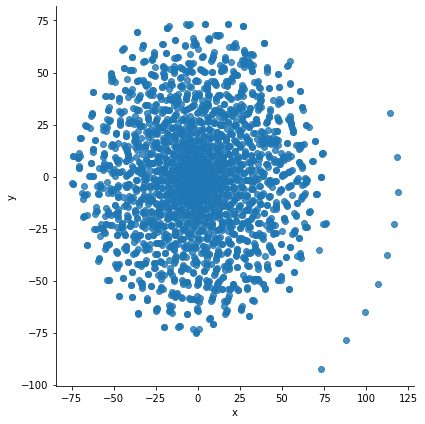

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans     
from sklearn.cluster import AgglomerativeClustering
sns.lmplot('x', 'y', data=galaxy_df, fit_reg=False, size=6)
plt.show()

In [28]:
# K-MEANS 
galaxy_kmeans = KMeans(n_clusters=3)
galaxy_predict = galaxy_kmeans.fit_predict(galaxy_df)
galaxy_predict

array([0, 2, 2, ..., 0, 2, 2])

In [29]:
galaxy_results = galaxy_df
galaxy_results["predict"] = galaxy_predict
galaxy_results[0:10]

,x,y,predict
초등학생,18.842188,-18.033592,0
스마트폰,-7.364922,-33.583694,2
관리,-32.794281,-21.828457,2
앱,-19.292154,52.330051,1
걱정,-16.721035,-44.093849,2
제,-19.879942,-47.077866,2
최근,15.177251,-0.228171,0
고민,-47.786190,-24.285700,2
부분,-12.301746,-16.201851,2
아이,-37.522888,-17.505096,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


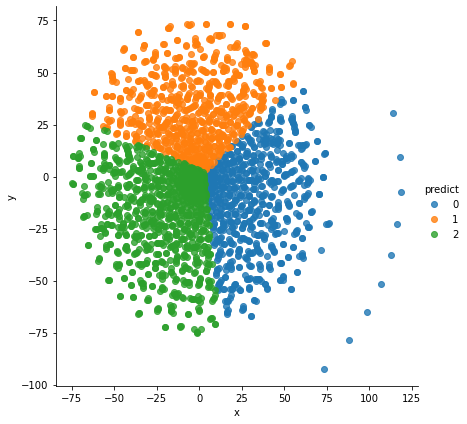

In [30]:
sns.lmplot('x', 'y', data=galaxy_results, fit_reg=False, size=6, hue="predict")
plt.show()

계층적 군집분석

In [31]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

galaxy_distmatrix = pdist(galaxy_df, metric='euclidean')
galaxy_row_dist = pd.DataFrame(squareform(galaxy_distmatrix))
galaxy_row_dist

,0,1,2,3,4,5,6,7,8,9,...,2549,2550,2551,2552,2553,2554,2555,2556,2557,2558
0,0.000000,30.538800,51.814341,80.039180,44.134791,48.445569,18.178690,66.950949,31.261796,56.403024,...,25.416086,26.257671,19.735374,18.036596,21.060663,24.735188,29.371309,16.314270,22.552829,34.142978
1,30.538800,0.000000,28.014959,86.743476,14.071254,18.404303,40.308070,41.476880,18.069331,34.176370,...,30.748296,31.531567,25.597352,36.112244,31.976258,24.745650,40.644819,34.417617,26.119793,35.972373
2,51.814341,28.014959,0.000000,75.384294,27.460825,28.360409,52.648269,15.191951,21.250945,6.407119,...,36.086975,36.188679,36.158752,47.415144,40.775450,31.393923,44.501047,46.648727,34.292734,34.320131
3,80.039180,86.743476,75.384294,0.000000,96.463357,99.414684,62.861011,81.748905,68.894756,72.182460,...,58.364381,57.413181,65.096833,62.004516,60.438626,63.237798,50.993550,63.755438,63.113773,51.128867
4,44.134791,14.071254,27.460825,96.463357,0.000000,4.345463,54.274288,36.843000,28.239931,33.759130,...,43.396236,44.073887,38.991486,49.933597,45.362654,37.239387,53.437534,48.298178,39.079768,47.194708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2554,24.735188,24.745650,31.393923,63.237798,37.239387,41.163221,21.311005,46.249260,10.867256,34.458017,...,6.161114,6.846207,5.314694,16.107655,9.519549,0.000000,16.227896,15.384159,2.915284,12.221078
2555,29.371309,40.644819,44.501047,50.993550,53.437534,57.368476,14.647220,58.217721,26.371028,45.929963,...,10.085657,9.465143,15.474718,11.691752,9.743855,16.227896,0.000000,13.152246,14.547233,11.051477
2556,16.314270,34.417617,46.648727,63.755438,48.298178,52.544900,6.228136,61.535118,25.720089,49.717049,...,12.307864,12.797964,10.765454,1.974422,6.969050,15.384159,13.152246,0.000000,12.500151,19.968871
2557,22.552829,26.119793,34.292734,63.113773,39.079768,43.100957,18.435152,49.163492,13.590602,37.368445,...,4.847499,5.759769,2.830687,13.253652,6.796322,2.915284,14.547233,12.500151,0.000000,12.719445


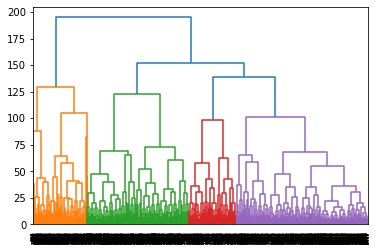

In [32]:
galaxy_row_clusters=linkage(galaxy_distmatrix,method='complete') #complete: 완전연결법
pd.DataFrame(galaxy_row_clusters)
galaxy_row_dendrogram = dendrogram(galaxy_row_clusters)

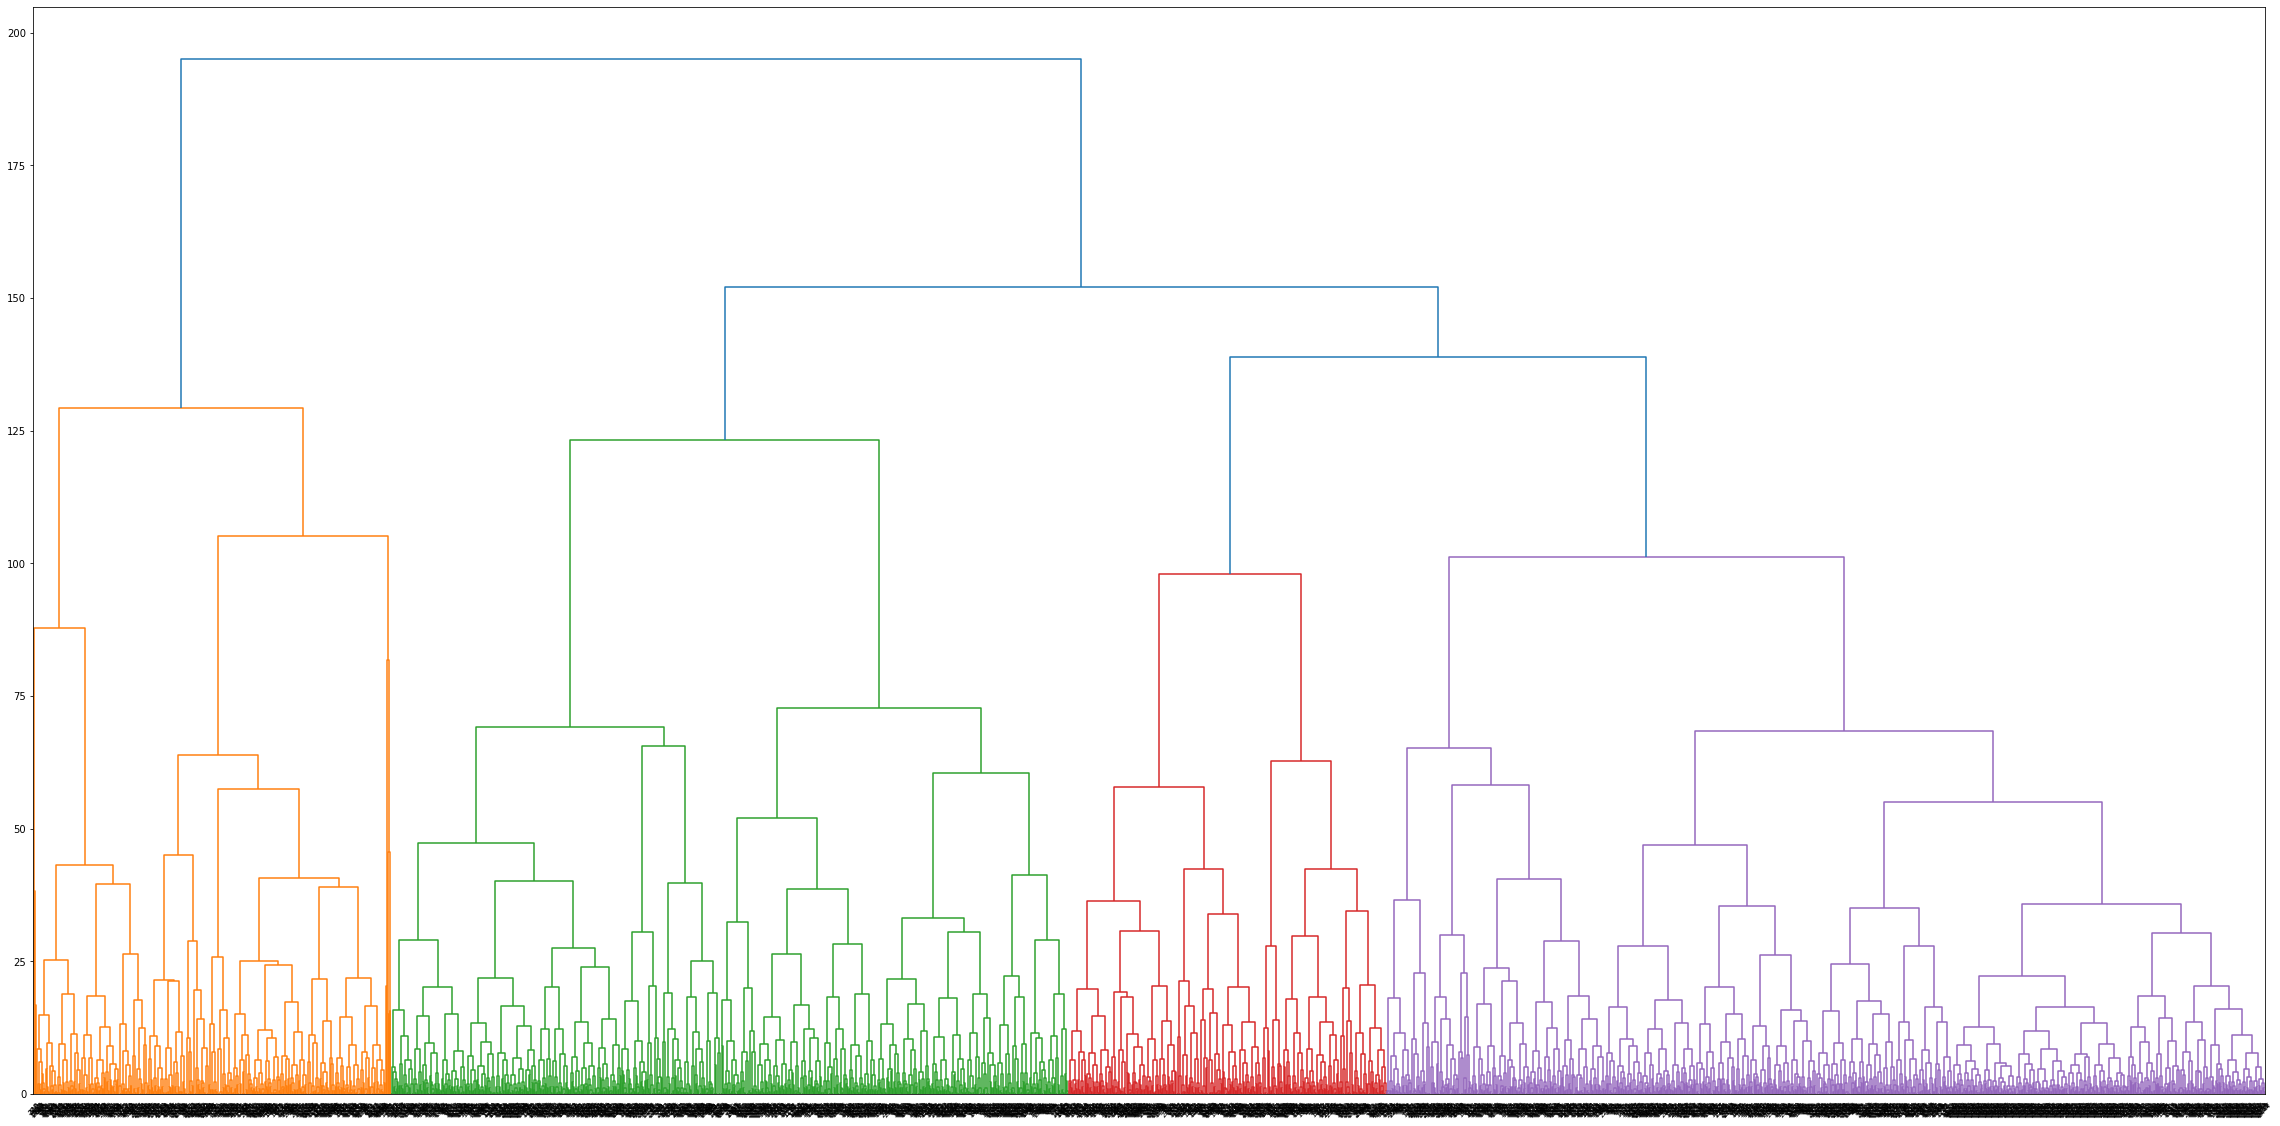

In [33]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

galaxy_mergings=linkage(galaxy_df,method='complete')

plt.figure(figsize=(40,20))
dendrogram(galaxy_mergings,
           leaf_rotation=50,
           leaf_font_size=7,
)
plt.show()

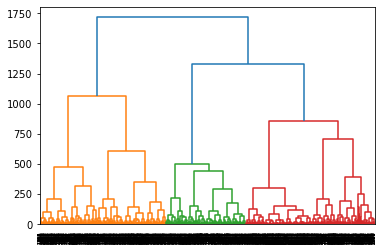

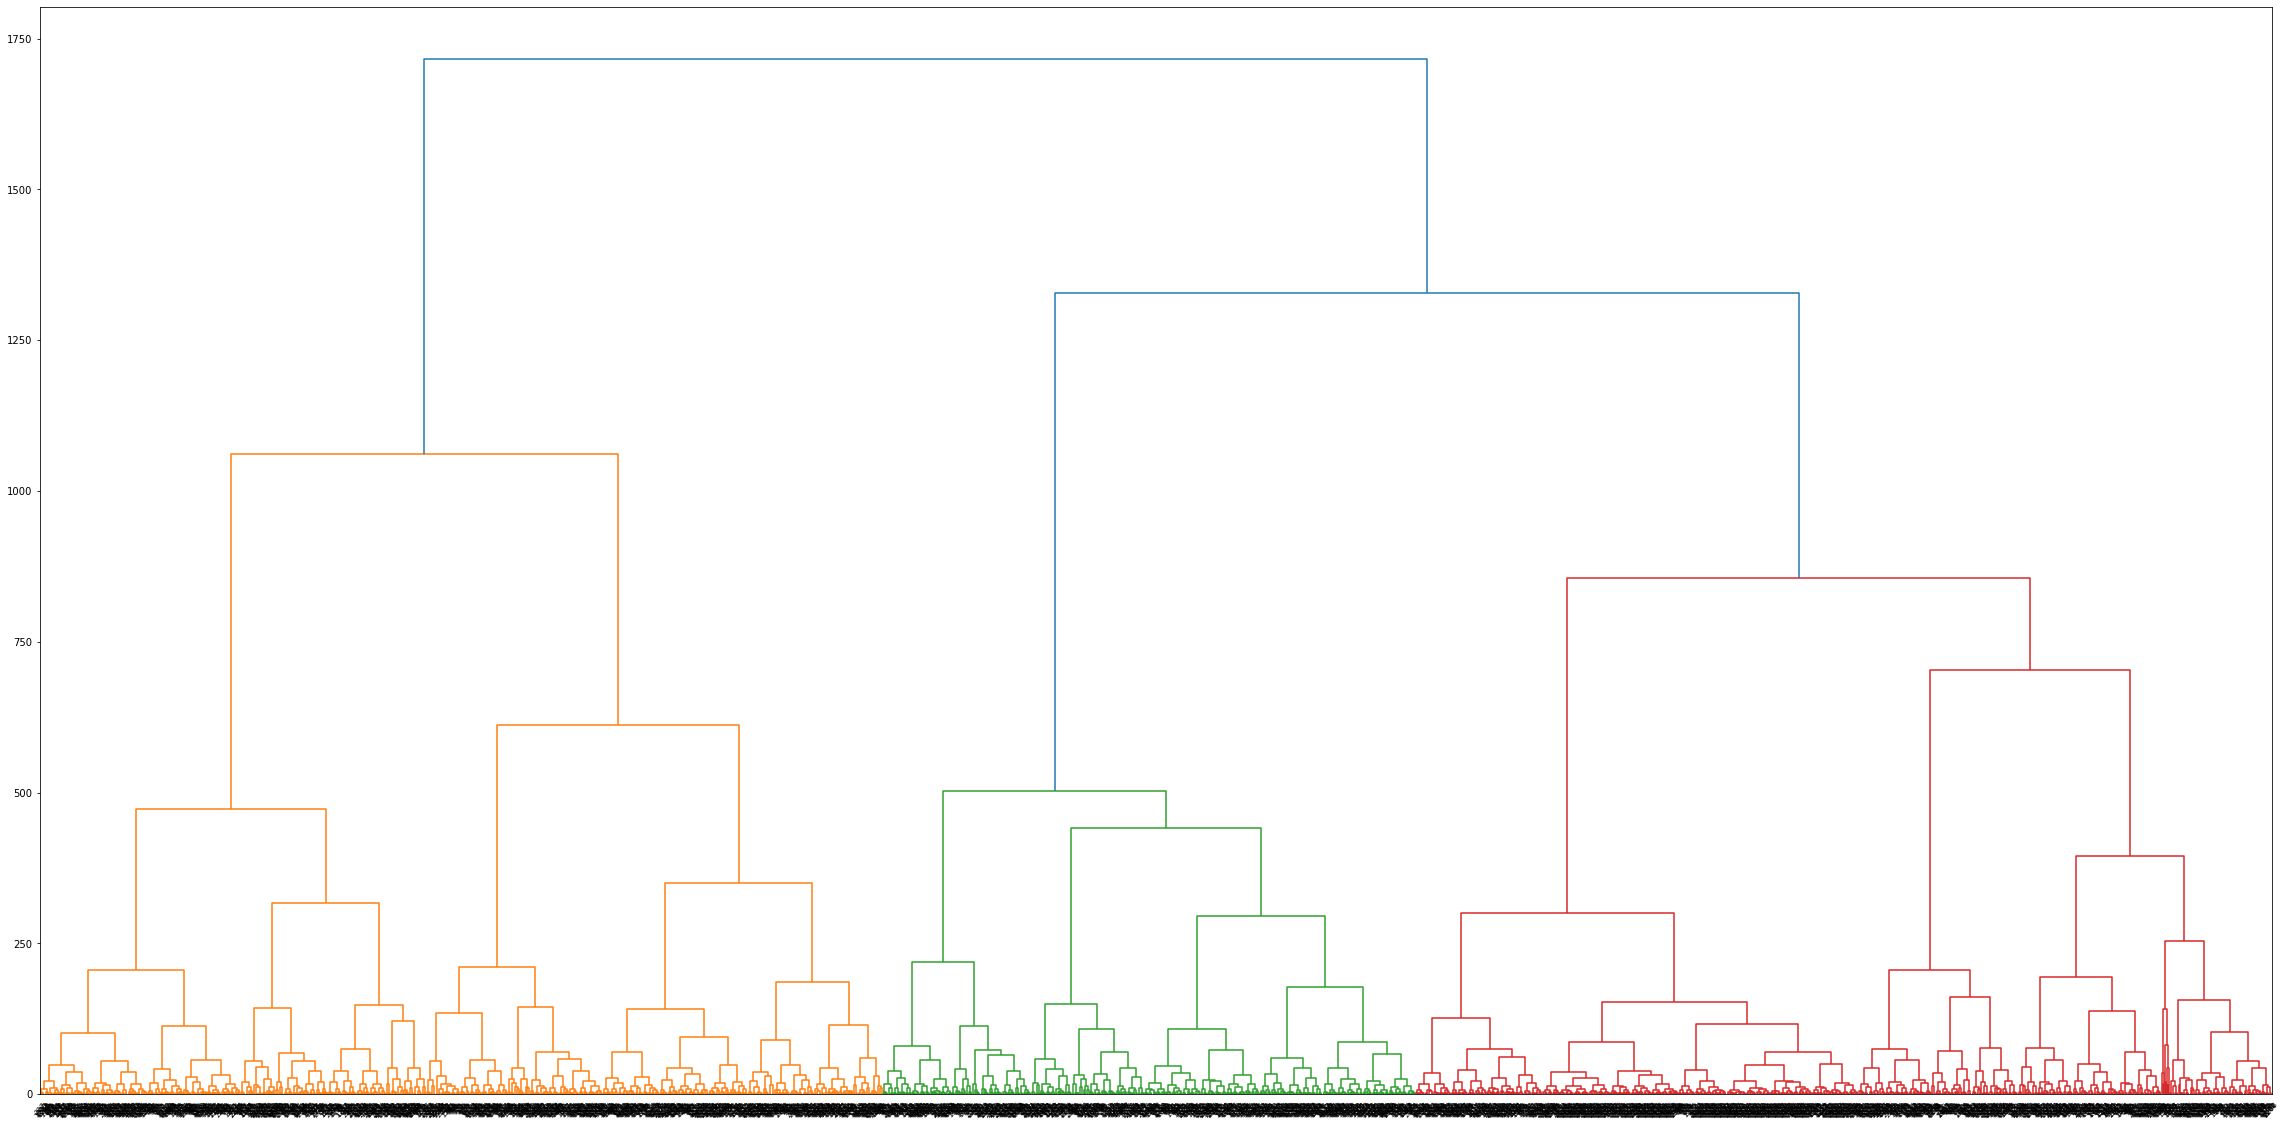

In [34]:
galaxy_row_clusters=linkage(galaxy_distmatrix,method='ward') # ward
pd.DataFrame(galaxy_row_clusters)
galaxy_row_dendrogram = dendrogram(galaxy_row_clusters)

from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

galaxy_mergings=linkage(galaxy_df,method='ward')

plt.figure(figsize=(40,20))
dendrogram(galaxy_mergings,
           leaf_rotation=50,
           leaf_font_size=7,
)
plt.show()